<a href="https://colab.research.google.com/github/AminIsmaili/EDA-for-Car-Price/blob/main/Zomato_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/zomato_restaurants_in_India.csv")
df.head(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [3]:
df.shape

(211944, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

**Data Cleaning And Preparation**

In [5]:
# Checking duplicate values
df.duplicated().sum()

151527

In [6]:
# Just for better understanding I applied for loop to seperatly check the duplictae values in column. This shows that
# regardless enormous duplicate elements in each column, we can remove it. Instead of droping duplications column wise,
# its better to remove it row wise to avoid data loss and maintain integrity of the data.
for col in df.columns:
  duplicate_col = df[col].duplicated().sum()
  print(f"{col}: {duplicate_col}")

res_id: 156376
name: 170844
establishment: 211917
url: 156376
address: 161286
city: 211845
city_id: 211861
locality: 208213
latitude: 158582
longitude: 158618
zipcode: 210632
country_id: 211943
locality_verbose: 208034
cuisines: 202561
timings: 204203
average_cost_for_two: 211799
price_range: 211940
currency: 211943
highlights: 180489
aggregate_rating: 211911
rating_text: 211905
votes: 209300
photo_count: 209430
opentable_support: 211942
delivery: 211941
takeaway: 211943


In [7]:
# This shows the actual duplicate values including the first occerence.
df.duplicated(keep=False).sum()

182882

In [8]:
# This shows duplicate values without first occurece
df.duplicated().sum()

151527

In [9]:
# This shows unique values in the dataset
len(df[~df.duplicated(keep=False)])

29062

In [10]:
# This shows unique values in the dataset
len(df[~df.duplicated()])

60417

In [11]:
# The above details about the duplicate values shows that dataset pertains duplicate values, however, unique identifier
# column is missing in dataset. This means that we should not directly drop all the duplicate values on one go. Instead,
# create a primary key column and then remove the duplicate values according to the requirement. This will save the loss
# of records.

In [12]:
# Drop the duplicate values
# However, we will drop duplicate values while keeping first occurences of the data elements

data = df.drop_duplicates(keep="first")
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [13]:
# Removing irrelavent and redundent columns to avoid repitition of informtaion and biasness.

data.drop(["url", "address", "latitude","longitude","locality_verbose", "currency","opentable_support", "takeaway", "country_id"], axis=1, inplace=True)
data.head(5)

,res_id,name,establishment,city,city_id,locality,zipcode,cuisines,timings,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,delivery
0,3400299,Bikanervala,['Quick Bites'],Agra,34,Khandari,NaN,"North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],Agra,34,Agra Cantt,282001.0,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,-1
2,3401013,Bhagat Halwai,['Quick Bites'],Agra,34,Shahganj,282010.0,"Fast Food, Mithai",9:30 AM to 11 PM,300,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,1
3,3400290,Bhagat Halwai,['Quick Bites'],Agra,34,Civil Lines,282002.0,"Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],Agra,34,Tajganj,NaN,"North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,1


In [14]:
# Dealing with Missing Values

missinf_data = data.isnull().mean()*100
missinf_data

,0
res_id,0.000000
name,0.000000
establishment,0.000000
city,0.000000
city_id,0.000000
locality,0.000000
zipcode,79.231011
cuisines,0.777927
timings,1.771025
average_cost_for_two,0.000000


zipcode     79.231011
cuisines     0.777927
timings      1.771025
dtype: float64
Axes(0.125,0.11;0.775x0.77)


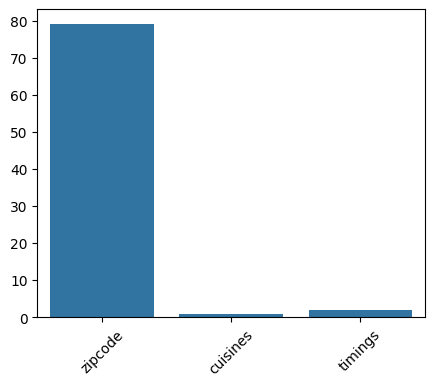

In [15]:
missing = data.isna().mean()*100
missing_data = missing[missing > 0]

print(missing_data)
plt.figure(figsize=(5, 4))
plt.xticks(rotation=45)
print(sns.barplot(missing_data))

<Axes: >

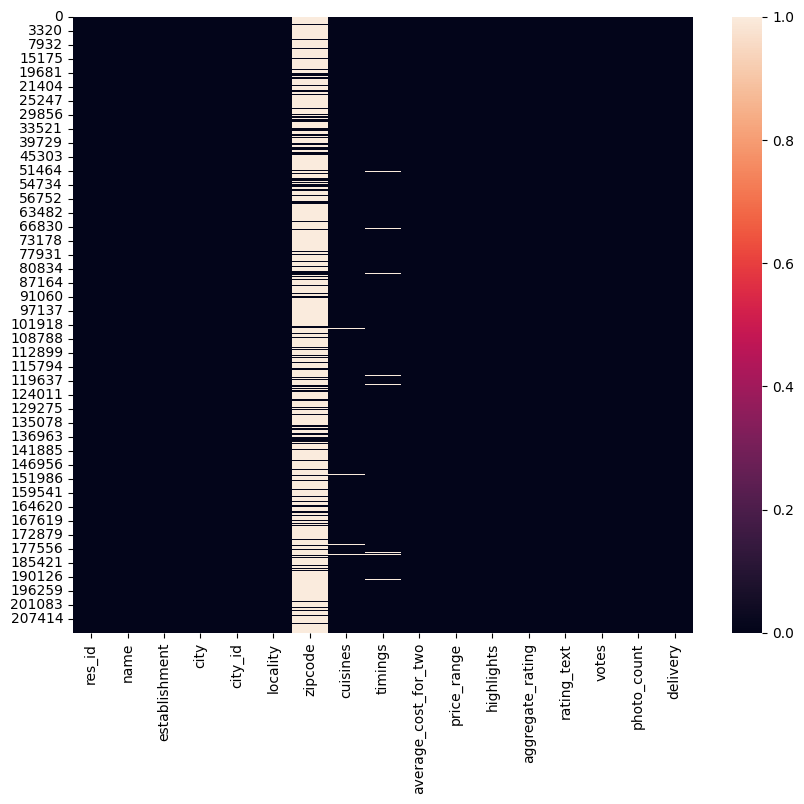

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.isnull())

<Axes: >

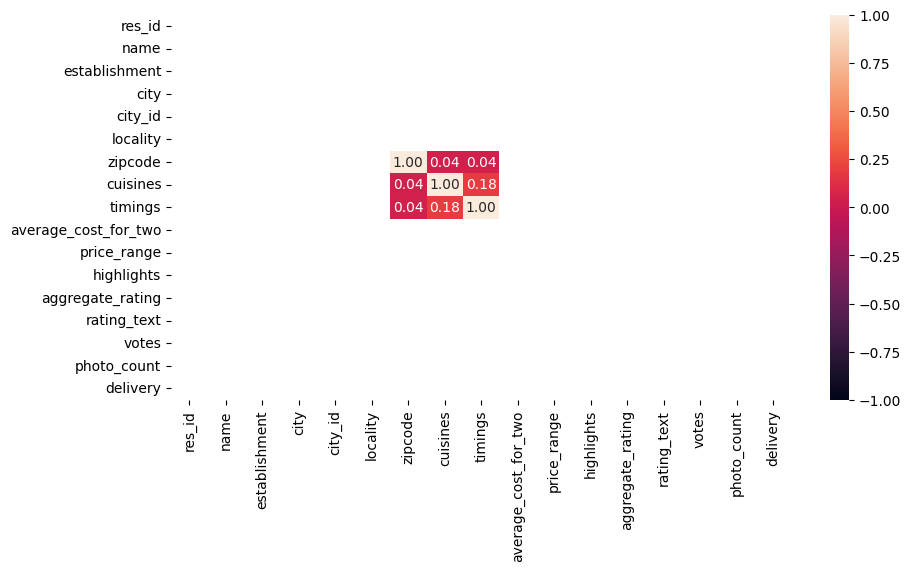

In [17]:
# check missing values correlation with other columns. So that we will deal accodingly
plt.figure(figsize=(10,5))
miss_data = data.isna().corr()
sns.heatmap(miss_data, annot=True, vmin=-1, vmax=1, fmt=".2f")

In [18]:
# Dealing with missing values
# "zipcode" columns contains missing values more then 70% that need to be removed.

data.drop("zipcode", axis=1, inplace=True)

In [19]:
# Follwing columns need be imputed
miss = data.isna().mean()*100
miss[miss > 0]

,0
cuisines,0.777927
timings,1.771025


In [20]:
# fill "No cuisine" in "cusisines" column
# used mode technique to fill in "timings" column

data["cuisines"] = data["cuisines"].fillna("No cuisine")
data["timings"] = data["timings"].fillna(data["timings"].mode()[0])

In [21]:
# Now we will check the "object" columns to clean the text if any
# we can see in the following table that "establishment", "timings", "highlights" need to be cleaned.
data.select_dtypes(include="object").head(5)

,name,establishment,city,locality,cuisines,timings,highlights,rating_text
0,Bikanervala,['Quick Bites'],Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),"['Lunch', 'Takeaway Available', 'Credit Card',...",Very Good
1,Mama Chicken Mama Franky House,['Quick Bites'],Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...","['Delivery', 'No Alcohol Available', 'Dinner',...",Very Good
2,Bhagat Halwai,['Quick Bites'],Agra,Shahganj,"Fast Food, Mithai",9:30 AM to 11 PM,"['No Alcohol Available', 'Dinner', 'Takeaway A...",Very Good
3,Bhagat Halwai,['Quick Bites'],Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),"['Takeaway Available', 'Credit Card', 'Lunch',...",Very Good
4,The Salt Cafe Kitchen & Bar,['Casual Dining'],Agra,Tajganj,"North Indian, Continental, Italian",11:30 AM to 11:30 PM,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",Excellent


In [22]:
data["establishment"] = data["establishment"].str.strip().str.replace(r"[^A-Za-z0-9 ]", " ", regex = True)
data["highlights"] = data["highlights"].str.strip().str.replace(r"[^A-Za-z0-9 ,]", " ", regex = True)

In [23]:
data.select_dtypes(include = "object").head(5)

,name,establishment,city,locality,cuisines,timings,highlights,rating_text
0,Bikanervala,Quick Bites,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),"Lunch , Takeaway Available , Credit Card ,...",Very Good
1,Mama Chicken Mama Franky House,Quick Bites,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...","Delivery , No Alcohol Available , Dinner ,...",Very Good
2,Bhagat Halwai,Quick Bites,Agra,Shahganj,"Fast Food, Mithai",9:30 AM to 11 PM,"No Alcohol Available , Dinner , Takeaway A...",Very Good
3,Bhagat Halwai,Quick Bites,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),"Takeaway Available , Credit Card , Lunch ,...",Very Good
4,The Salt Cafe Kitchen & Bar,Casual Dining,Agra,Tajganj,"North Indian, Continental, Italian",11:30 AM to 11:30 PM,"Lunch , Serves Alcohol , Cash , Credit Ca...",Excellent


In [24]:
# # Now remove literals or day's names because we only need time in the column
data["timings"] = data["timings"].str.replace(r"(Midnight|\(.*\))", "", regex=True)

In [25]:
data.head(2)

,res_id,name,establishment,city,city_id,locality,cuisines,timings,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,delivery
0,3400299,Bikanervala,Quick Bites,Agra,34,Khandari,"North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm,700,2,"Lunch , Takeaway Available , Credit Card ,...",4.4,Very Good,814,154,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,Agra,34,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",12:30PM to 12,600,2,"Delivery , No Alcohol Available , Dinner ,...",4.4,Very Good,1203,161,-1


In [26]:
# After cleaning all the extra characters, litterals and patterns, I will create ranges/bins from column"average_cost_for_two" and column "aggregate_rating" for better
# understanding.
q_bins = 5

data["price_range_for_two"] = pd.qcut(data["average_cost_for_two"], q = q_bins, labels = ["V.Low", "Low", "Medium", "High", "V.High"])
data["price_range_for_two"].value_counts()

,count
price_range_for_two,
V.Low,17236
V.High,11934
High,11323
Low,10733
Medium,9191


In [27]:
bin_edges = [-1, 0.0, 1.8, 3.0, 4.0, 4.5, 5.0]
label = ["Not Rated", "Poor", "Average", "Good", "V.Good", "Excellent"]

data["aggregate_rating_bins"] = pd.cut(data["aggregate_rating"], bins=bin_edges, labels= label)
data['aggregate_rating_bins'].value_counts()

,count
aggregate_rating_bins,
Good,32170
Not Rated,10159
V.Good,10031
Average,6754
Excellent,1301
Poor,2


In [28]:
# I will replace column "price_range" with the column "price_range_for_two" that gives more clarity based on the explaianable ranges. Moreover I will also remove
# column "rating_text" as new column rating has been created.

data.drop(["price_range", "rating_text"], axis=1, inplace=True)
data.head(5)

,res_id,name,establishment,city,city_id,locality,cuisines,timings,average_cost_for_two,highlights,aggregate_rating,votes,photo_count,delivery,price_range_for_two,aggregate_rating_bins
0,3400299,Bikanervala,Quick Bites,Agra,34,Khandari,"North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm,700,"Lunch , Takeaway Available , Credit Card ,...",4.4,814,154,-1,High,V.Good
1,3400005,Mama Chicken Mama Franky House,Quick Bites,Agra,34,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",12:30PM to 12,600,"Delivery , No Alcohol Available , Dinner ,...",4.4,1203,161,-1,High,V.Good
2,3401013,Bhagat Halwai,Quick Bites,Agra,34,Shahganj,"Fast Food, Mithai",9:30 AM to 11 PM,300,"No Alcohol Available , Dinner , Takeaway A...",4.2,801,107,1,Low,V.Good
3,3400290,Bhagat Halwai,Quick Bites,Agra,34,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",8am – 11pm,300,"Takeaway Available , Credit Card , Lunch ,...",4.3,693,157,1,Low,V.Good
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,Agra,34,Tajganj,"North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,"Lunch , Serves Alcohol , Cash , Credit Ca...",4.9,470,291,1,V.High,Excellent


**Data Description and Analysis**

In [29]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [30]:
df.describe(include="object")

,name,establishment,url,address,city,locality,zipcode,locality_verbose,cuisines,timings,currency,highlights,rating_text
count,211944,211944,211944,211810,211944,211944,48757,211944,210553,208070,211944,211944,211944
unique,41100,27,55568,50657,99,3731,1311,3910,9382,7740,1,31455,39
top,Domino's Pizza,['Quick Bites'],https://www.zomato.com/chennai/3bs-buddies-bar...,"Laxman Jhula, Tapovan, Rishikesh",Chennai,Civil Lines,0,"Ana Sagar Lake, Ajmer",North Indian,11 AM to 11 PM,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",Very Good
freq,3108,64390,169,299,11630,3660,7100,1760,15996,26605,211944,3352,65451


Correlation Analysis

In [31]:
# Correlation Matrix
data.select_dtypes(exclude=["object", "category"]).corr()

,res_id,city_id,average_cost_for_two,aggregate_rating,votes,photo_count,delivery
res_id,1.000000,0.463902,-0.196259,-0.253419,-0.200272,-0.090803,0.021881
city_id,0.463902,1.000000,-0.210367,-0.266710,-0.197854,-0.173436,-0.036737
average_cost_for_two,-0.196259,-0.210367,1.000000,0.255455,0.274503,0.325103,-0.056059
aggregate_rating,-0.253419,-0.266710,0.255455,1.000000,0.277531,0.229990,0.212771
votes,-0.200272,-0.197854,0.274503,0.277531,1.000000,0.676583,0.061342
photo_count,-0.090803,-0.173436,0.325103,0.229990,0.676583,1.000000,0.030630
delivery,0.021881,-0.036737,-0.056059,0.212771,0.061342,0.030630,1.000000


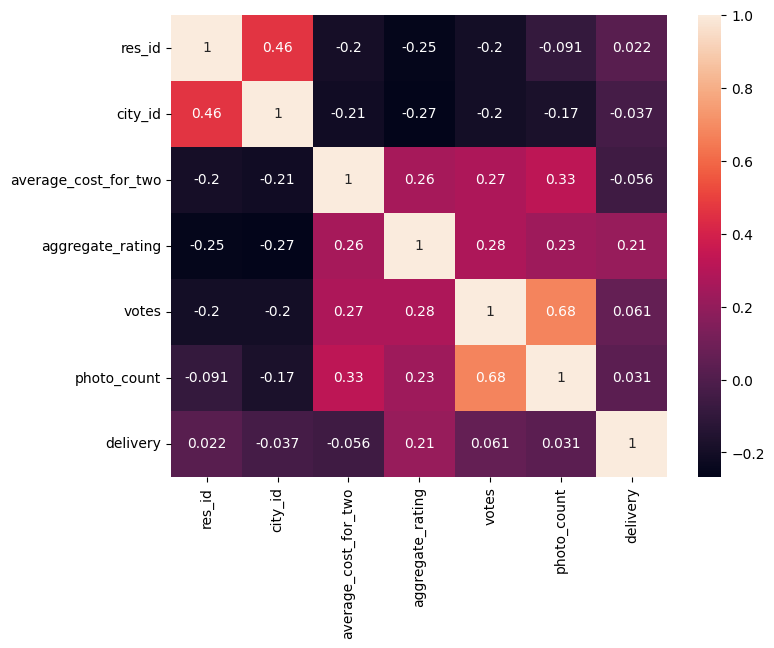

In [32]:
# Correlation using Heatmap

plt.figure(figsize=(8, 6))
dataset = data.select_dtypes(exclude=["object", "category"])

sns.heatmap(dataset.corr(), annot=True)

plt.show()

Distribution Analysis

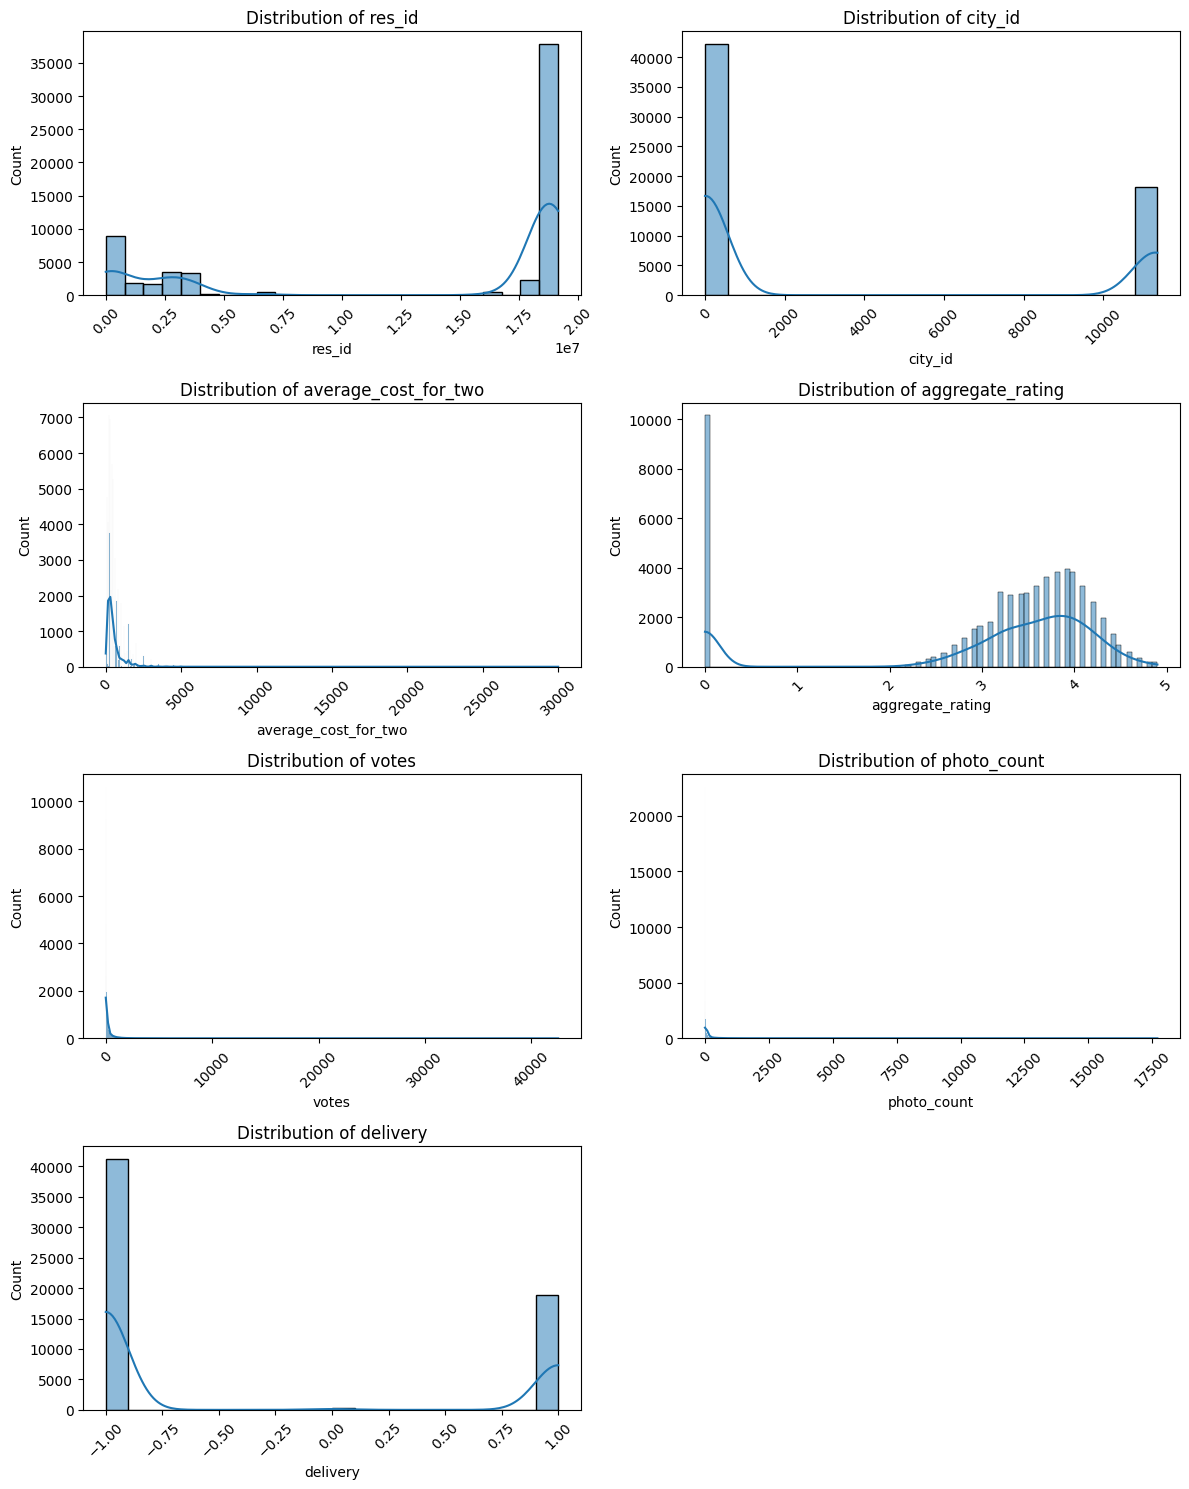

In [33]:
#  Analyze Ditsribution

plt.figure(figsize=(12, 15))

num_columns = data.select_dtypes(include="number")
for i, column in enumerate(num_columns.columns):
  plt.subplot(4, 2, i+1)
  sns.histplot(data[column], kde=True)
  plt.title(f"Distribution of {column}")
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [34]:
#  checking which column has normal distribution

for column in data.select_dtypes(include="number"):
  k2, p = stats.normaltest(data[column])

  if p > 0.05:
    print(f"{column}:    Normal Distribution")
  else:
    print(f"{column}:    Not Normal Distribution")

res_id:    Not Normal Distribution
city_id:    Not Normal Distribution
average_cost_for_two:    Not Normal Distribution
aggregate_rating:    Not Normal Distribution
votes:    Not Normal Distribution
photo_count:    Not Normal Distribution
delivery:    Not Normal Distribution


Distribution Analysis:

The distribution analysis was performed using histograms and the Shapiro-Wilk test for normality.

Findings:

res_id, city_id, average_cost_for_two, aggregate_rating, votes, photo_count, and delivery columns are not normally distributed based on the Shapiro-Wilk test.
Visual inspection of the histograms shows that average_cost_for_two, aggregate_rating, votes, and photo_count exhibit skewed distributions.

In [35]:
# Now checking skewness of each column

for column in data.select_dtypes(include="number"):
  skewness = data[column].skew()
  if skewness < -1 or skewness > 1:
    print(f"{column}:   skewed")
  else:
    print(f"{column}:   Not Skewed")

res_id:   Not Skewed
city_id:   Not Skewed
average_cost_for_two:   skewed
aggregate_rating:   skewed
votes:   skewed
photo_count:   skewed
delivery:   Not Skewed


Skewness Analysis:

The skewness analysis was performed using the skew() method in pandas. Findings

Feature, average_cost_for_two, aggregate_rating, votes, and photo_count exhibit significant skewness. These features have skewed distribution with a longer tail on one side. This skewness can indicate:
1. The presence of extreme values or outliers.
2. A non-symmetrical data distribution.
3. A concentration of data points towards lower or higher values.

Outliers Detection

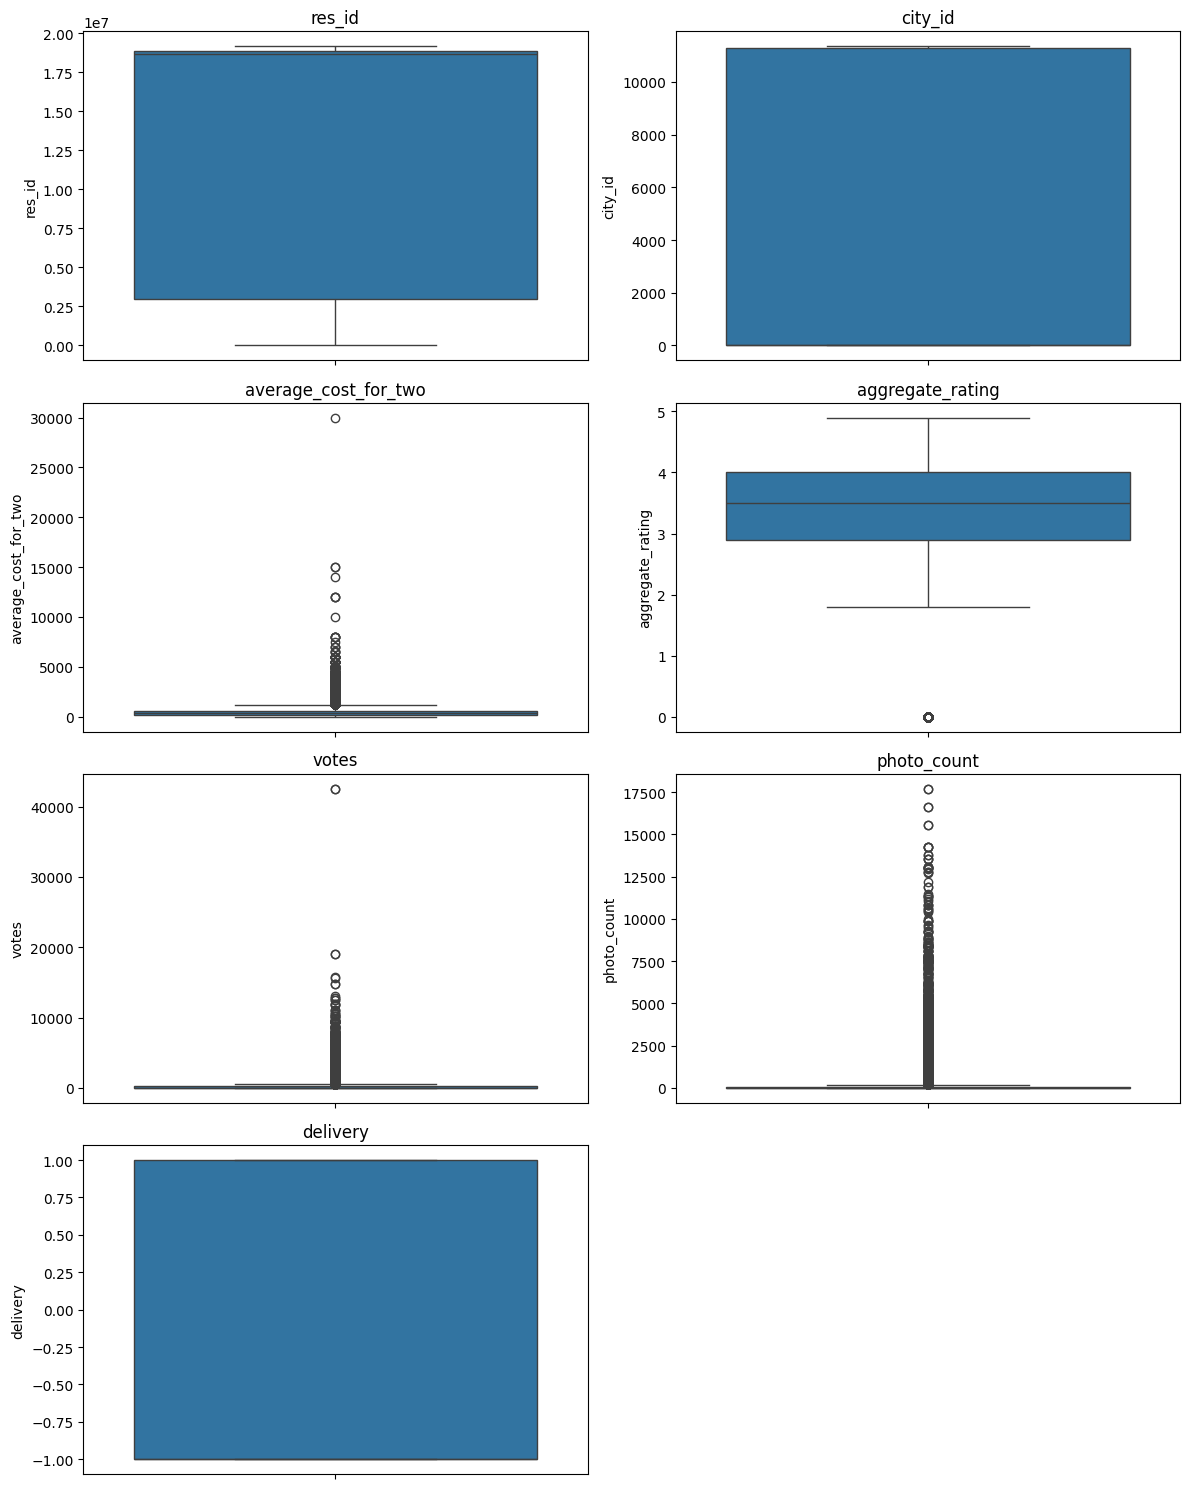

In [36]:
# Checking outliers in the dataset

plt.figure(figsize=(12,15))
num_data = data.select_dtypes(include="number")

for i, column in enumerate(num_data.columns):
  plt.subplot(4, 2, i+1)
  sns.boxplot(data[column])
  plt.title(f"{column}")

plt.tight_layout()
plt.show()

In [37]:
#  We will remove outliers using IQR technique becuase we have seen that some features are highly skewed.

num_col = data.select_dtypes(include="number")

quarter_1 = num_col.quantile(0.25)
quarter_3 = num_col.quantile(0.75)

IQR = quarter_3 - quarter_1

lower_bound = quarter_1-1.5*IQR
upper_bound = quarter_3+1.5*IQR

In [38]:
# Identifying outliers

outliers = ((num_col<lower_bound) | (num_col>upper_bound)).any(axis=True).sum()
outliers

23435

**Outlier Detection and Removal using IQR:**

I used the Interquartile Range (IQR) method to detect and remove outliers. Here's why this method is suitable, especially when dealing with skewed distributions:

Robustness to Skewness: The IQR method is less sensitive to extreme values and skewness compared to methods based on the mean and standard deviation (like z-scores). It focuses on the central 50% of the data, making it more robust to outliers and skewed data.

Suitable for Non-Normal Distributions: Since many of the features are not normally distributed, the IQR method is a better choice for outlier removal. Methods based on normal distribution assumptions may not accurately identify outliers in skewed data.

Effective Outlier Identification: The IQR method defines outliers as data points falling below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 and Q3 are the first and third quartiles, respectively. This range effectively captures outliers in the tails of skewed distributions.

By using the IQR method, I identified and removed 23,435 outliers. This step helps to improve the reliability of the data analysis as outliers can significantly impact the results of statistical models and visualizations.

In [39]:
# Data without outliers

clean_data = data[~((num_col<lower_bound) | (num_col>upper_bound)).any(axis=True)]
clean_data.head(4)

,res_id,name,establishment,city,city_id,locality,cuisines,timings,average_cost_for_two,highlights,aggregate_rating,votes,photo_count,delivery,price_range_for_two,aggregate_rating_bins
8,3401284,Cake House,Bakery,Agra,34,Civil Lines,"Bakery, Fast Food",9 AM to 9 PM,500,"Takeaway Available , Cash , Indoor Seating...",3.4,322,14,1,High,Good
13,3400457,Yadav Dhaba Purana,Dhaba,Agra,34,Civil Lines,North Indian,10:30 AM to 11:30 PM,300,"Lunch , Cash , No Alcohol Available , Din...",4.1,361,9,1,Low,V.Good
14,3400282,Aahar,Casual Dining,Agra,34,Civil Lines,"North Indian, South Indian, Chinese, Bakery, C...",10 AM to 11 PM,700,"Dinner , Delivery , Lunch , Takeaway Avai...",4.1,474,52,1,High,V.Good
15,3400611,Domino's Pizza,Quick Bites,Agra,34,Kamla Nagar,"Pizza, Fast Food",10:57 AM to 11 PM,400,"Credit Card , Dinner , Debit Card , Takea...",3.5,490,17,-1,Medium,Good


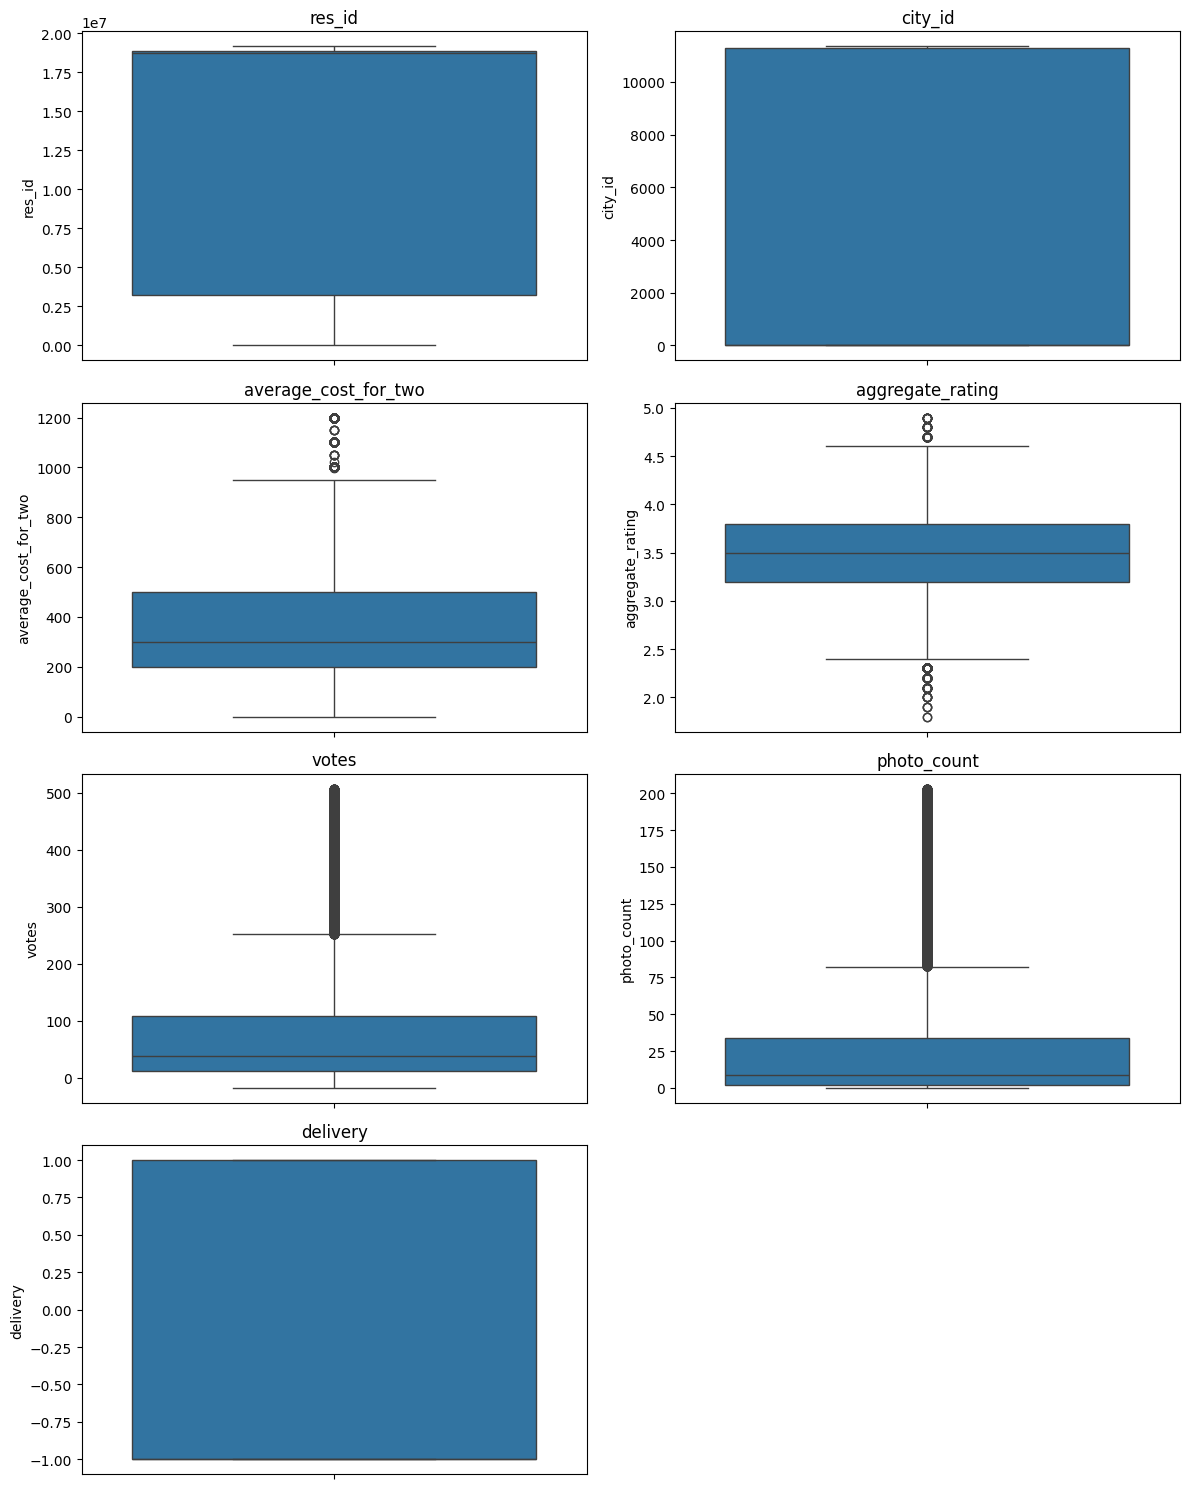

In [40]:
# Now check outliers using boxplot

plt.figure(figsize=(12, 15))
num_columns = clean_data.select_dtypes(include="number")

for i, col in enumerate(num_columns.columns):
  plt.subplot(4, 2, i+1)
  sns.boxplot(num_columns[col])
  plt.title(f"{col}")
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [41]:
# Now we have clean data to generate insights
clean_data.shape

(36982, 16)

In [42]:
clean_data.head(2)

,res_id,name,establishment,city,city_id,locality,cuisines,timings,average_cost_for_two,highlights,aggregate_rating,votes,photo_count,delivery,price_range_for_two,aggregate_rating_bins
8,3401284,Cake House,Bakery,Agra,34,Civil Lines,"Bakery, Fast Food",9 AM to 9 PM,500,"Takeaway Available , Cash , Indoor Seating...",3.4,322,14,1,High,Good
13,3400457,Yadav Dhaba Purana,Dhaba,Agra,34,Civil Lines,North Indian,10:30 AM to 11:30 PM,300,"Lunch , Cash , No Alcohol Available , Din...",4.1,361,9,1,Low,V.Good


**Analytics and Analysis**

In [43]:
# Cities with highest order transactions

clean_data["city"].value_counts()[:10]

,count
city,
Chennai,1364
Bangalore,1006
Lucknow,885
Pune,856
Jaipur,824
Vadodara,814
Surat,813
Coimbatore,742
Indore,738


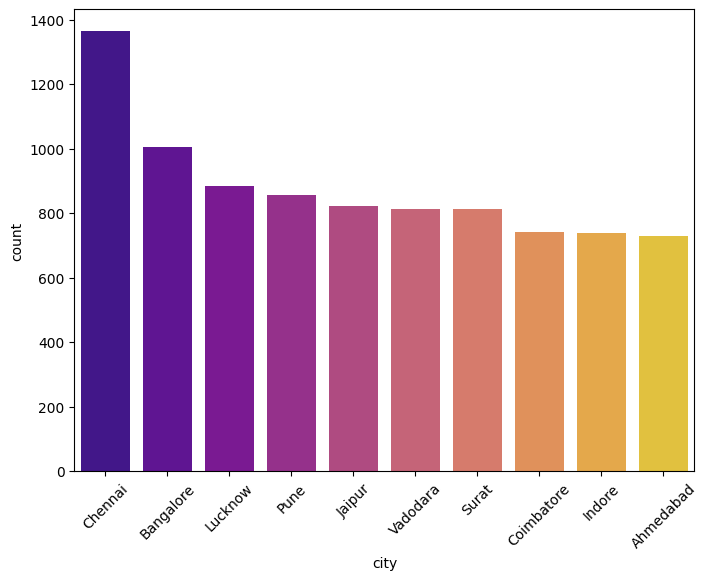

In [44]:
plt.figure(figsize=(8, 6))
sns.barplot(clean_data["city"].value_counts()[:10], palette = "plasma")
plt.xticks(rotation=45)
plt.show()

In [45]:
# From the following data, North Indian, South Indian and Fast Food are the most favroute
# cusisines of Indians.
clean_data["cuisines"].value_counts()[:10]

,count
cuisines,
North Indian,3102
Fast Food,1520
"North Indian, Chinese",1194
South Indian,1059
Bakery,963
Street Food,870
Cafe,770
Mithai,683
Desserts,632


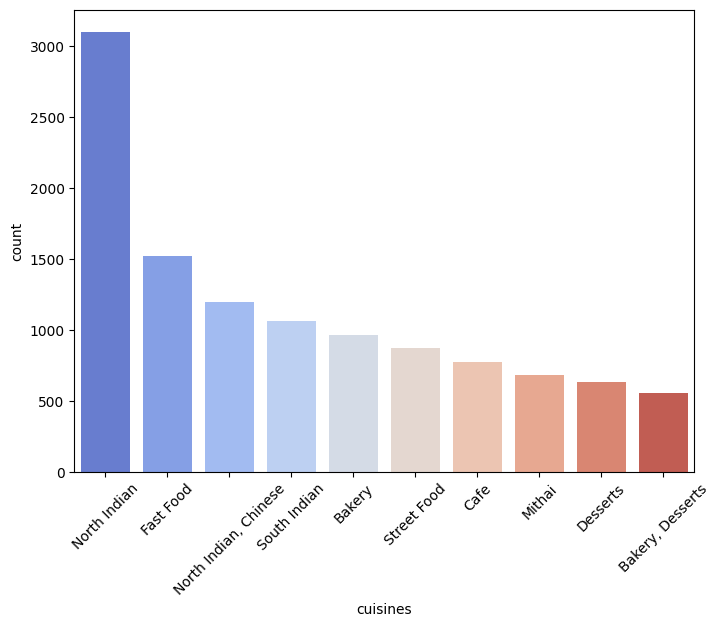

In [46]:
plt.figure(figsize=(8, 6))

sns.barplot(clean_data["cuisines"].value_counts()[:10], palette="coolwarm")
plt.xticks(rotation = 45)
plt.show()

In [47]:
# Follwing table shows that diversity and the level of cosumption of cuisines based on cities. This also shows that most of the people of the follwoing
# cities like to order north indian food followed by south indian. The insight has proven that North Indian cuisine is dominating.

cuisine_data = clean_data.groupby("city")["cuisines"].value_counts().reset_index()
cuisine_data[(cuisine_data["count"] < 150) & (cuisine_data["count"] > 70)]

,city,cuisines,count
0,Agra,North Indian,97
537,Allahabad,North Indian,79
780,Amritsar,North Indian,97
1168,Bangalore,"Mithai, Street Food",99
1493,Bhopal,North Indian,91
2143,Chennai,South Indian,88
2144,Chennai,"Ice Cream, Desserts",87
4255,Gwalior,North Indian,88
4679,Indore,North Indian,73
5066,Jaipur,North Indian,144


<Figure size 600x400 with 0 Axes>

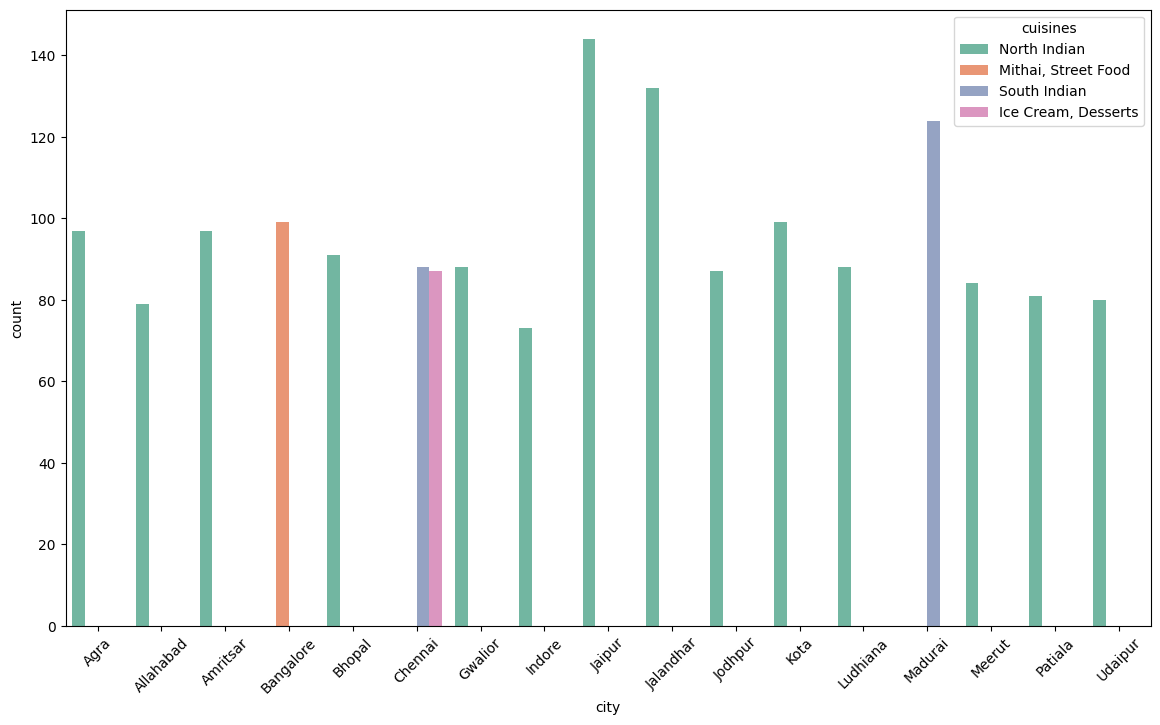

In [48]:
plt.figure(figsize=(6, 4))
filtered_data = cuisine_data[(cuisine_data["count"] < 150) & (cuisine_data["count"] > 70)]

plt.figure(figsize=(14, 8))
sns.barplot(
    data=filtered_data,
    x="city",
    y="count",
    hue="cuisines",  # Group by cuisines
    palette="Set2"
)
plt.xticks(rotation=45)
plt.show()

  price_range_for_two  count
0               V.Low  11317
1                 Low   7989
2                High   7482
3              Medium   6795
4              V.High   3399
--------------------------------------------------


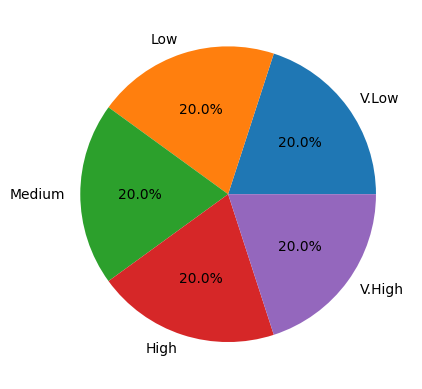

In [49]:
# Price range distribution from very low to very high shows the buying pattern of people based on price ranges. It is also evident
# that prices directly impact the buying preferneces of the people.

print(clean_data["price_range_for_two"].value_counts().reset_index())
print("-"*50)

price_range_distribution = clean_data["price_range_for_two"].value_counts().reset_index()
value=price_range_distribution["price_range_for_two"].value_counts()
labels = price_range_distribution["price_range_for_two"].value_counts().index
explode = (0.025, 0.025)
plt.pie(value, labels=labels, autopct='%1.1f%%')
plt.show()

In [50]:
# How does the distribution of price ranges vary across cities or regions, revealing differences in affordability preferences?
price_range_and_city = clean_data.groupby("city")["price_range_for_two"].value_counts().reset_index()
price_range_and_city.sort_values(by="count", ascending=False)[:10]

,city,price_range_for_two,count
60,Chennai,V.Low,414
170,Jaipur,V.Low,305
61,Chennai,Medium,302
62,Chennai,High,275
245,Ludhiana,V.Low,273
465,Vadodara,V.Low,254
40,Bangalore,High,248
240,Lucknow,V.Low,248
63,Chennai,Low,246
380,Raipur,V.Low,246


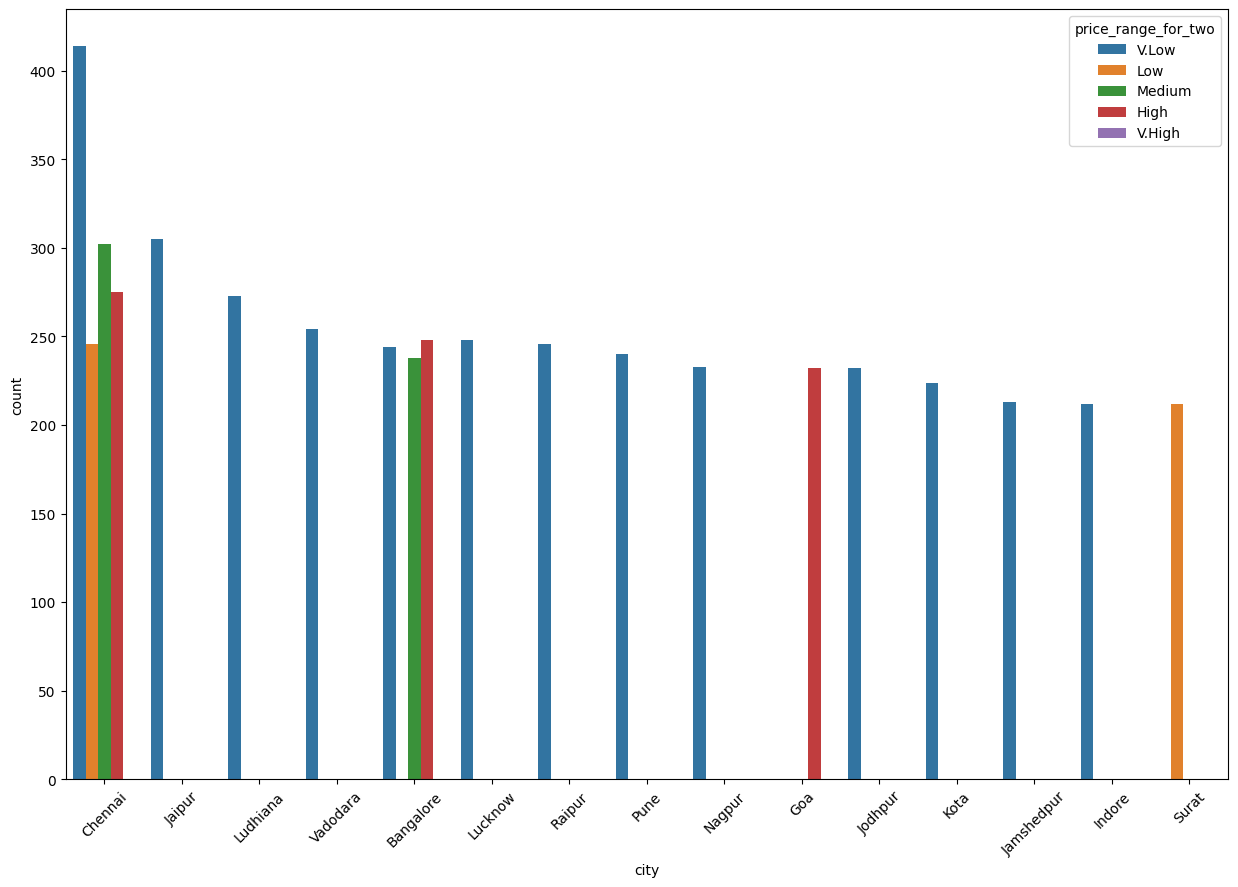

In [51]:
plt.figure(figsize=(15, 10))

sns.barplot(x="city", y="count", hue="price_range_for_two", data=price_range_and_city.sort_values(by="count", ascending=False)[:20])
plt.xticks(rotation=45)
plt.show()

In [52]:
# To furher analyze the price_range and city table, we found the cities which spends the most on the food items.
# Following information shows the name of the cities with "V.High" spendings on food. It is also visible in Goa people prefer to buy expensive food.
# Goa is also a touriest destination that could also be the reason that restaurents have high paid customers.

price_range_and_city[price_range_and_city["price_range_for_two"] == "V.High"].sort_values(by="count", ascending=False)[:10]

,city,price_range_for_two,count
111,Goa,V.High,202
64,Chennai,V.High,127
137,Guwahati,V.High,99
44,Bangalore,V.High,91
84,Dehradun,V.High,89
249,Ludhiana,V.High,88
244,Lucknow,V.High,86
429,Surat,V.High,79
374,Pune,V.High,78
4,Agra,V.High,77


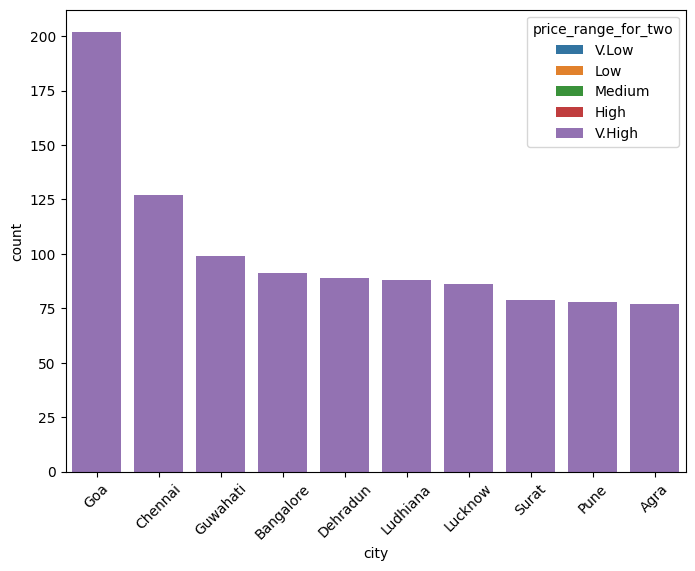

In [53]:
plt.figure(figsize=(8, 6))
top_spending_cities = price_range_and_city[price_range_and_city["price_range_for_two"] == "V.High"].sort_values(by="count", ascending=False)[:10]

sns.barplot(x="city", y="count", hue= "price_range_for_two", data=top_spending_cities)

plt.xticks(rotation=45)
plt.show()

In [54]:
# Following data shows the cities in which people prerfer affordability. Top ten cities with highest number of "V.Low" price range.

price_range_and_city[price_range_and_city["price_range_for_two"] == "V.Low"].sort_values(by="count", ascending=False)[:10]

,city,price_range_for_two,count
60,Chennai,V.Low,414
170,Jaipur,V.Low,305
245,Ludhiana,V.Low,273
465,Vadodara,V.Low,254
240,Lucknow,V.Low,248
380,Raipur,V.Low,246
41,Bangalore,V.Low,244
370,Pune,V.Low,240
295,Nagpur,V.Low,233
200,Jodhpur,V.Low,232


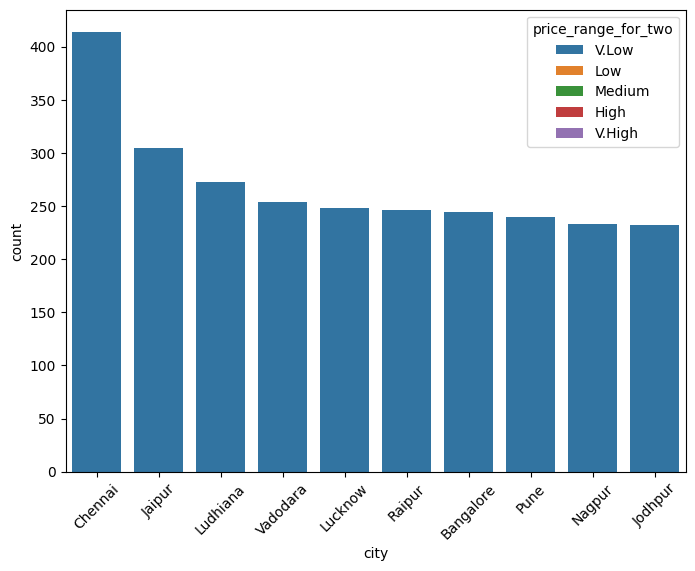

In [55]:
plt.figure(figsize=(8, 6))
least_spending_cities = price_range_and_city[price_range_and_city["price_range_for_two"] == "V.Low"].sort_values(by="count", ascending=False)[:10]
sns.barplot(x="city", y="count", hue= "price_range_for_two", data=least_spending_cities)

plt.xticks(rotation=45)
plt.show()

In [56]:
# The tables below depicts that which "establishment" or type of restuarent people prefer to spend either V.High or V.Low.

estab_price = clean_data.groupby("establishment")["price_range_for_two"].value_counts().reset_index()
print(estab_price[estab_price["price_range_for_two"] == "V.High"].sort_values(by="count", ascending=False)[:10])

print("-"*50)

print(estab_price[estab_price["price_range_for_two"] == "V.Low"].sort_values(by="count", ascending=False)[:10])

         establishment price_range_for_two  count
36     Casual Dining                V.High   2202
10               Bar                V.High    300
34              Caf                 V.High    266
90            Lounge                V.High    161
124      Quick Bites                V.High    129
65       Fine Dining                V.High     92
74        Food Court                V.High     48
115              Pub                V.High     48
4                                   V.High     45
9             Bakery                V.High     33
--------------------------------------------------
           establishment price_range_for_two  count
120        Quick Bites                 V.Low   4082
55     Dessert Parlour                 V.Low   1292
130         Sweet Shop                 V.Low   1047
15       Beverage Shop                 V.Low    891
5               Bakery                 V.Low    854
0                                      V.Low    665
85               Kiosk             

In [62]:
# Following insights reveal yhe impact of prices on rating. It is clearly visible that in all ranges from Excellent to Average,
# V.Low price range is more preferable to the customers.
rating_and_price_impact = clean_data.groupby(['aggregate_rating_bins', 'price_range_for_two'])['name'].count().reset_index()

for rating_range in rating_and_price_impact["aggregate_rating_bins"].unique():
  if rating_range not in ["Poor", "Not Rated"]:
    print(rating_and_price_impact[rating_and_price_impact["aggregate_rating_bins"] == rating_range])
    print("-"*50)

   aggregate_rating_bins price_range_for_two  name
10               Average               V.Low  1917
11               Average                 Low  1413
12               Average              Medium  1210
13               Average                High  1422
14               Average              V.High   566
--------------------------------------------------
   aggregate_rating_bins price_range_for_two  name
15                  Good               V.Low  8592
16                  Good                 Low  5788
17                  Good              Medium  4804
18                  Good                High  5210
19                  Good              V.High  2401
--------------------------------------------------
   aggregate_rating_bins price_range_for_two  name
20                V.Good               V.Low   772
21                V.Good                 Low   760
22                V.Good              Medium   743
23                V.Good                High   811
24                V.Good       

In [58]:
clean_data.columns

Index(['res_id', 'name', 'establishment', 'city', 'city_id', 'locality',
       'cuisines', 'timings', 'average_cost_for_two', 'highlights',
       'aggregate_rating', 'votes', 'photo_count', 'delivery',
       'price_range_for_two', 'aggregate_rating_bins'],
      dtype='object')

In [59]:
# Following are the top ten restaurents based on each rating. This shows that which restaurent is top rated and the rating count depicts that
# consistancy of rating secured by each restaurent.

print(clean_data[clean_data["aggregate_rating_bins"] == "Excellent"][["name", "aggregate_rating_bins"]].value_counts()[:10])
print("-"*50)

print(clean_data[clean_data["aggregate_rating_bins"] == "V.Good"][["name", "aggregate_rating_bins"]].value_counts()[:10])
print("-"*50)

print(clean_data[clean_data["aggregate_rating_bins"] == "Good"][["name", "aggregate_rating_bins"]].value_counts()[:10])
print("-"*50)

print(clean_data[clean_data["aggregate_rating_bins"] == "Average"][["name", "aggregate_rating_bins"]].value_counts()[:10])
print("-"*50)

print(clean_data[clean_data["aggregate_rating_bins"] == "Poor"][["name", "aggregate_rating_bins"]].value_counts()[:10])

name                             aggregate_rating_bins
Shree Anandhaas                  Excellent                3
Corner House Ice Cream           Excellent                3
Naturals Ice Cream               Excellent                3
DNS- Desserts N Shakes           Excellent                3
Jalaram Open Kitchen Restaurant  Excellent                2
KFC                              Excellent                2
China Xpress                     Excellent                2
Shawarmaji                       Excellent                2
Cuisino                          Excellent                2
Dahiya Momo`s                    Excellent                2
Name: count, dtype: int64
--------------------------------------------------
name                    aggregate_rating_bins
Keventers               V.Good                   31
Natural Ice Cream       V.Good                   28
Subway                  V.Good                   28
McDonald's              V.Good                   28
KFC           

In [ ]:
# Cities with maximum ratio of high rated restaurents. In the follwing table I tried to get cities wise highest counted rating.

highest_counts =(
clean_data.groupby("city")["aggregate_rating_bins"]
.value_counts()
.reset_index()
.sort_values(["city", "count"], ascending=[True, False])
.drop_duplicates("city")
)
highest_counts.sort_values(by = "count", ascending=False)[:10]

In [ ]:
# Follwoing table shows that which rating from excellent to poor has higest count based on cuisines.

print(clean_data[["cuisines", "aggregate_rating_bins"]].value_counts().reset_index().sort_values(by="count", ascending=False)[:10])


In [ ]:
# Following insights reveal that which restaurent is frequently being ordrered in each city.
city_name_highest_count = (clean_data.groupby("city")["name"]
                           .value_counts()
                           .reset_index()
                           .sort_values(by=["city", "count"], ascending=[True, False])
                           .drop_duplicates("city"))
city_name_highest_count.sort_values(by="count", ascending=False)

**Customer Preferences Analysis**

Price Sensitivity: Customers demonstrate a preference for restaurants with lower price ranges ("V.Low", "Low") across all rating categories, except "Poor". This suggests that affordability is a key factor influencing customer choices, regardless of the restaurant's rating.
High Ratings with Lower Prices: The high count of restaurants with lower price ranges in the "Excellent", "V.Good" and "Good" rating categories, indicates a significant customer preference for restaurants offering both high quality and affordability.
High-End Dining: While most customers prioritize affordability, a segment of customers are willing to pay higher prices for higher-rated restaurants, particularly in the "V.High" and "High" price ranges. These customers are likely more focused on the quality and dining experience.
Other Insights into Customer Preferences

Cuisine Popularity: North Indian, South Indian, and Fast Food cuisines are most popular among customers. This aligns with the prevalence of these cuisines across various price ranges and ratings.

City-Specific Preferences: There are regional variations in cuisine preferences and price range distributions. For instance, Goa has a higher proportion of high-priced restaurants, reflecting tourist demand and luxury options. Customers in specific cities may prioritize different factors when choosing restaurants based on local preferences and dining culture.
Restaurant Chains: Certain restaurant chains, such as Pizza Hut and Moti Mahal, have achieved wider recognition and popularity, particularly in the higher price ranges. Their brand recognition and quality offerings attract customers seeking well-established dining experiences.

In [ ]:
# Competitive Anlysis

# Following insights shows the competitive edge in terms of V.High prices. Pizza Hut, Moti Mahal, The Cascade, Blue Tokal Coffee Roasters etc
# are the most expensive restuarents.

v_high_top_competitors = (clean_data[clean_data["price_range_for_two"] == "V.High"][["name", "price_range_for_two"]]
                   .value_counts()
                   .reset_index()
                   .sort_values(by="count", ascending=False))
v_high_top_competitors

In [ ]:
# Following table shows that which restuarents are famous for "High" prices. And among High prices restuarents which is on top.


high_top_competitors = (clean_data[clean_data["price_range_for_two"] == "High"][["name", "price_range_for_two"]]
                   .value_counts()
                   .reset_index()
                   .sort_values(by="count", ascending=False))
high_top_competitors

In [ ]:
# Following table shows that which restuarents are famous for "Low" prices. And among Low prices restuarents which is on top.

Low_top_competitors = (clean_data[clean_data["price_range_for_two"] == "Low"][["name", "price_range_for_two"]]
                   .value_counts()
                   .reset_index()
                   .sort_values(by="count", ascending=False))
Low_top_competitors

**Key Insights and Competitive Advantages:**

V.High Price Range: Restaurants in this category, such as Pizza Hut, Moti Mahal, The Cascade, and Blue Tokai Coffee Roasters, position themselves as premium or luxury dining options. They may offer a higher level of service, ambiance, or specialized cuisine to justify their higher prices. They compete based on exclusivity, brand recognition, and the overall dining experience.

High Price Range: Restaurants in this category occupy a middle ground between premium and affordable dining. They may offer a wider variety of cuisines and dining experiences while maintaining a higher price point compared to "Low" price range restaurants. They compete by balancing quality and affordability, often targeting customers seeking a more upscale dining experience.

Low Price Range: Restaurants in this category focus on affordability and value for money. They often offer casual dining experiences with a diverse menu selection to attract a broader customer base. They compete by offering competitive prices, convenient locations, and diverse cuisine options.

This information can be used to refine pricing strategies, target specific customer segments, and optimize operational and marketing efforts to gain a competitive advantage.